In [110]:
import numpy as np
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from keras.datasets import mnist

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def load_mnist_dataset(nbr_sample):
    (x_train, y_train), (_,_) = mnist.load_data()
    dataset = (np.array([x.flatten() for x in x_train[:nbr_sample]])).T
    return x_train,y_train,dataset

def load_hand_dataset(path, nbr_sample):
    filelist = os.listdir(path)
    x_train = np.array([np.array(Image.open(os.getcwd() + '\\Hands\\normalized_32\\' + fname))[:,:,0] for fname in filelist[:nbr_sample]])
    y_train = []
    dataset = np.array(np.array([x.flatten() for x in x_train]).T, dtype=int)
    
    return x_train,y_train,dataset

class PCA_custom(object):
    def __init__(self, t_dim, t_newDim, t_nbr_samples, mode):

        self.dim = t_dim
        self.new_dim = t_newDim
        self.nbr_sample = t_nbr_samples
        
        if mode == 'mnist':
            self.x_train, self.y_train, self.dataset = load_mnist_dataset(self.nbr_sample)
            
        if mode == 'hand':
            self.x_train, self.y_train, self.dataset = load_hand_dataset("Hands/normalized_32", self.nbr_sample)

        print('loaded dataset shape : ', self.dataset.shape)
        print('dataset : \n', self.dataset[0])
        self.show_images_raw(10)
        
        #process the covariance matrix
        print('dataset shape : ', self.dataset.shape)
        self.cov_mat = np.cov(self.dataset)
        print('cov matrix shape : ', self.cov_mat.shape)
        
        #get the eig values/vectors
        self.eig_val, self.eig_vec = np.linalg.eig(self.cov_mat)
        self.eig_val = np.real(self.eig_val)
        self.eig_vec = np.real(self.eig_vec)
        
        self.sorted_vectors = np.array([x[1] for x in sorted(zip(self.eig_val, self.eig_vec), key=lambda x: x[0])])
        self.show_eig_val()
        
        #extract the "t_newDim" best eig values        
        self.sorted_vectors = self.sorted_vectors[:t_newDim].T
        print('\nSorted vector shape: ', self.sorted_vectors.shape)
        print('\nkeeping ', t_newDim, 'dimension...')
        
        #transform the matrix
        self.transformed_dataset = np.dot(self.dataset.T, np.transpose(self.sorted_vectors).T)
        print('\n transformed dataset shape : \n', self.transformed_dataset.shape)
        if mode == 'mnist':
            self.show_samples()
        
        #decompress data
        self.decompressed = np.dot(self.transformed_dataset, self.sorted_vectors.T)
        self.show_images_transformed(10)
        
    def show_samples(self):
        
        plt.scatter(self.transformed_dataset[:, 1],
                    self.transformed_dataset[:, 0],
                    c=self.y_train,
                    cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
        plt.xlabel('component 2')
        plt.ylabel('component 1')
        plt.title('projection in 2D')
        plt.colorbar()
        plt.show()

    def show_eig_val(self):
        # graph of the eig val
        plt.plot(sorted(self.eig_val, reverse=True))
        plt.title('Valeurs propres ordonnées')
        plt.xlim(0, self.dim ** 2)
        plt.show()
    
    def show_images_raw(self, n):
        plt.figure(figsize=(20, 4))
        for i,image in enumerate(self.x_train[:n]):
            # display original
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(image.reshape(self.dim, self.dim))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
        
    def show_images_transformed(self, n):
        plt.figure(figsize=(20, 4))
        for i,image in enumerate(self.decompressed[:10]) :
            # display original
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(np.array(image, dtype=int).reshape(self.dim, self.dim))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

loaded dataset shape :  (1024, 10000)
dataset : 
 [253 255 255 ..., 255 255 255]
First 5 images :
RAW IMAGES :



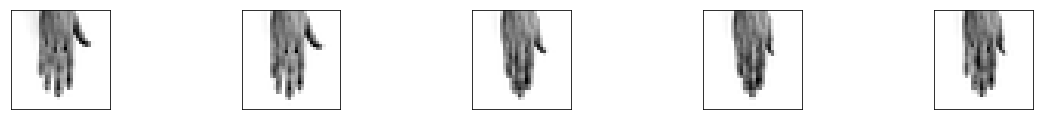

dataset shape :  (1024, 10000)


cov matrix shape :  (1024, 1024)


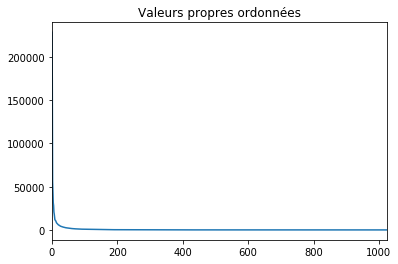


Sorted vector shape:  (1024, 1024)

Projection in :  1024 dimension...



 transformed dataset shape : 
 (10000, 1024)


TRANSFORMED IMAGES :



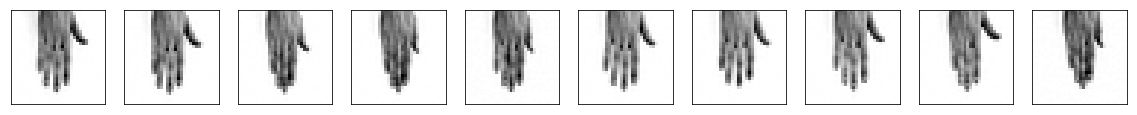

In [112]:
from PIL import Image
import os

#PCA_custom(size of images, nbr of dimension at the end, nbr of samples)
#PCA_custom(28, 50, 60000, mode='mnist')
PCA_custom(32, 1024, 10000, mode='hand')